# Plot PPDisk Simple Model 1 Part1 - Dust
* CREDIT: RADMC-3D EXAMPLES
* MODELING TARGET: HD163296

## 00 - About *HD163296*

### Information:
* RA DEC (FK5): 17h53m20.6063742757s -21d56m57.379723676s
* Star Class: Herbig Ae/Be star
* Spectral Type: A1Vep C
* Star Mass: 2.3 $M_{\odot}$
* Star Radius: 1.66 $R_{\odot}$
* Star Temperature: 9330 K
* Distance to us: 140. pc
* Inclination Angle: $42^{\circ}$
* Position Angle: $132^{\circ}$
* Disk Radius: 250. unit:AU
* Gap Position: 60., 100., 160. unit:AU

### Reference:
* *Rosenfeld et al.(2013)*
* *Isella et al. (2016)*
* *Gregorio-Monsalvo et al. (2013)*
* http://simbad.u-strasbg.fr/simbad/sim-id?Ident=HD+163296
* http://www.exoplanetkyoto.org/exohtml/HD_163296.html
* https://sites.uni.edu/morgans/astro/course/Notes/section2/spectraltemps.html

## 00 - Radmc3D Input (Control File for Monte Carlo Simulation)

In [45]:
nphot    = 1000000
# Write the radmc3d.inp control file
with open('radmc3d.inp','w+') as f:
    f.write('nphot = %d\n'%(nphot))
    f.write('scattering_mode_max = 1\n')
    f.write('modified_random_walk = 1\n')  # Put this to 1 for random walk
    f.write('iranfreqmode = 1\n')

In [46]:
# Close Line Mode
from os import system
from os.path import isfile
if isfile('lines.inp'):
    system('rm lines.inp')

## 01 - Set Up

In [2]:
import numpy as np
import os
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt
from matplotlib import cm
from radmc3dPy import *

### (1) Dust Opacity

Reading dustkappa_silicate.inp


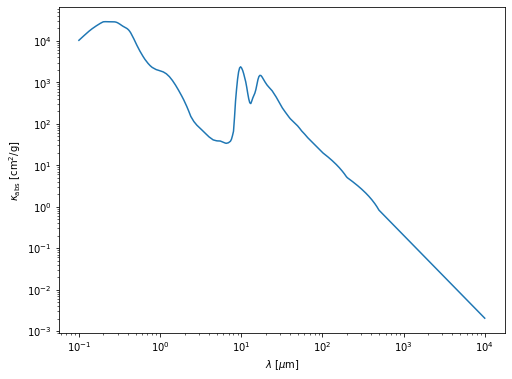

In [3]:
opac = analyze.readOpac(ext=['silicate'])
plt.figure(figsize=(8,6))
plt.loglog(opac.wav[0], opac.kabs[0])
plt.xlabel(r'$\lambda$ [$\mu$m]')
plt.ylabel(r'$\kappa_{\rm abs}$ [cm$^2$/g]')
plt.show()

## 02 - Plot 2D Contour

In [4]:
data = analyze.readData(ddens=True, dtemp=True, binary=False)

Reading amr_grid.inp
Reading dust_density.inp
Reading dust_temperature.dat


### (1) Dust Density Dist. With Specific Optical Depth Contour

In [9]:
wav = 1324.
data.getTau(wav=wav)

Reading dustkappa_silicate.inp
Opacity at 1324.00um :  0.11683896760663337


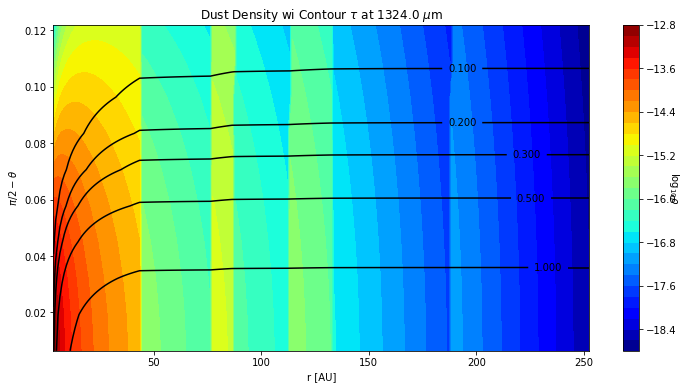

In [33]:
plt.figure(figsize=(12,6))
c = plt.contourf(data.grid.x/natconst.au, np.pi/2.-data.grid.y, np.log10(data.rhodust[:,:,0,0].T), 30, cmap='jet')
plt.xlabel('r [AU]')
plt.ylabel(r'$\pi/2-\theta$')
#plt.xscale('log')
cb = plt.colorbar(c)
cb.set_label(r'$\log_{10}{\rho}$', rotation=270.)

c = plt.contour(data.grid.x/natconst.au, np.pi/2.-data.grid.y, data.taux[:,:,0].T, [0.1, 0.2, 0.3, 0.5, 1],  colors='k', linestyles='solid')
plt.clabel(c, inline=1, fontsize=10)
plt.title(r'Dust Density wi Contour $\tau$ at {:.1f} $\mu$m'.format(wav))
plt.show()

### (2) Temperature Dist. With Temperature Contour 
- #### Dust Temperature from Formulas

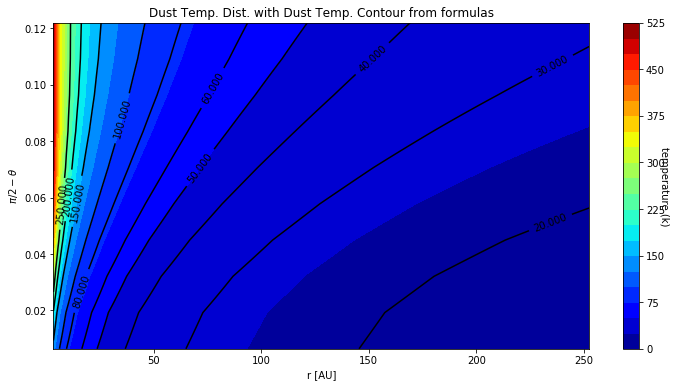

In [26]:
plt.figure(figsize=(12,6))

cs = plt.contourf(data.grid.x/natconst.au, np.pi/2.-data.grid.y, data.dusttemp[:,:,0,0].T, 20, cmap='jet')
cb = plt.colorbar(cs)
cb.set_label(r'temperature (k)', rotation=270.)

temp_level = [20., 30., 40., 50., 60.,80., 100., 150., 200., 250.]
c = plt.contour(data.grid.x/natconst.au, np.pi/2.-data.grid.y, data.dusttemp[:,:,0,0].T, temp_level, colors='k', linestyles='solid', alpha=1.)
plt.clabel(c, inline=1, fontsize=10)
plt.clim(16, 256)

plt.title('Dust Temp. Dist. with Dust Temp. Contour from formulas')
plt.xlabel('r [AU]')
plt.ylabel(r'$\pi/2-\theta$')
#plt.xscale('log')
plt.show()

## 03 - Plot SED

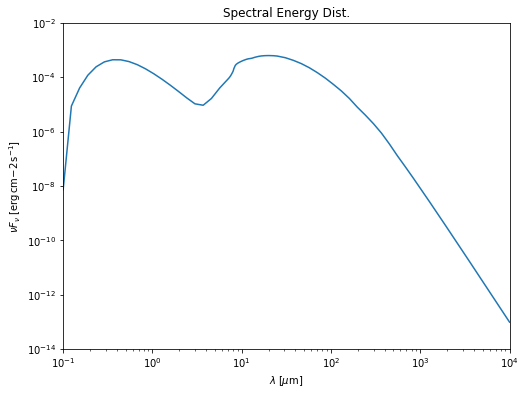

In [43]:
# Plot the SED as seen at 1 pc distance
s     = analyze.readSpectrum()
lam   = s[:,0]
nu    = 1e4*natconst.cc/lam
fnu   = s[:,1]
nufnu = nu*fnu

plt.figure(figsize=(8, 6))
plt.plot(lam,nufnu)
plt.xscale('log')
plt.yscale('log')
plt.axis([1e-1, 1e4, 1e-14, 1e-2])
plt.title('Spectral Energy Dist.')
plt.xlabel('$\lambda\; [\mu \mathrm{m}$]')
plt.ylabel('$\\nu F_\\nu \; [\mathrm{erg}\,\mathrm{cm}{-2}\,\mathrm{s}^{-1}]$')
plt.savefig('SED.png')
plt.show()

## 04 - Make Image

### (1) HD163296

#### 1. Physical Size

Reading image.out


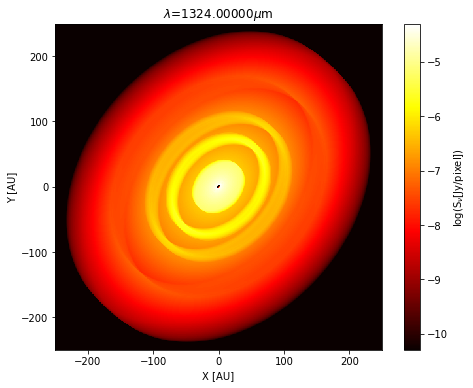

In [44]:
image.makeImage(npix=500, incl=42., posang=-132., wav=1324., sizeau=500)   # This calls radmc3d
im = image.readImage()
plt.figure(figsize=(8, 6))
image.plotImage(im, log=True, au=True, dpc=122., maxlog=6, bunit='snu', cmap='hot')
plt.show()

#### 2. Sky Coordinate 

Reading image.out


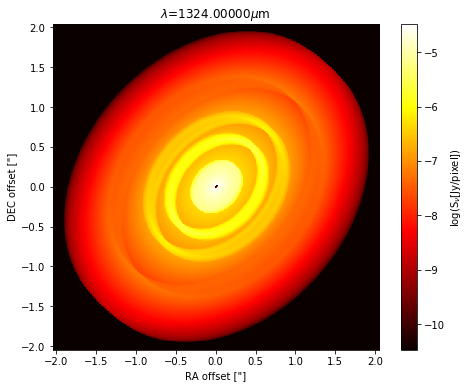

In [47]:
image.makeImage(npix=500, incl=42., posang=-132., wav=1324., sizeau=500)   # This calls radmc3d
#im.writeFits('HD163296_wav1324.fits', dpc=122., coord='17h53m20.6063742757s -21d56m57.379723676s')
im = image.readImage()
plt.figure(figsize=(8, 6))
image.plotImage(im, log=True, arcsec=True, dpc=122, maxlog=6, bunit='snu', cmap='hot')
plt.show()

### (2) HD163296 Edge-on

Reading image.out


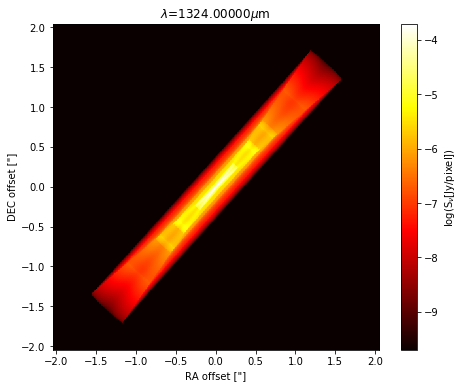

In [48]:
image.makeImage(npix=500, incl=90., posang=-132., wav=1324., sizeau=500)   # This calls radmc3d 
im = image.readImage()
plt.figure(figsize=(8, 6))
image.plotImage(im, log=True, arcsec=True, dpc=122, maxlog=6, bunit='snu', cmap='hot')
plt.show()

### (3) HD163296 Face-on

Reading image.out


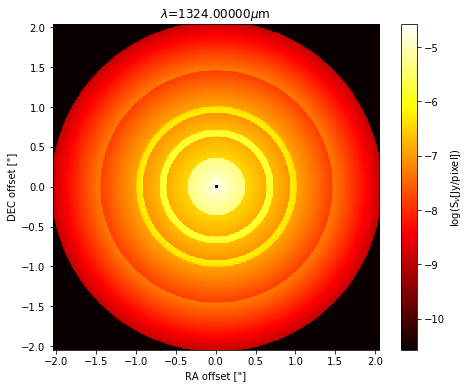

In [49]:
image.makeImage(npix=500, incl=0., posang=-132., wav=1324., sizeau=500)   # This calls radmc3d 
im = image.readImage()
plt.figure(figsize=(8, 6))
image.plotImage(im,log=True, arcsec=True, dpc=122, maxlog=6, bunit='snu', cmap='hot')
plt.show()